In [1]:
# naive HMM model for shakespeare

In [3]:
from pre_processing import *
from syllable_dictionary import *
from split_poem import *
import os
import numpy as np
from IPython.display import HTML
import heapq
from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

[nltk_data] Downloading package punkt to /Users/ywwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /Users/ywwu/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [2]:
# generate by the sequence of poems

In [4]:
filename = "./project3/data/shakespeare.txt"
obs_p, obs_map_p = pre_processing_poems(filename)

In [5]:
hmm8_p = unsupervised_HMM(obs_p, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


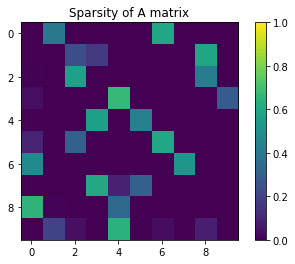

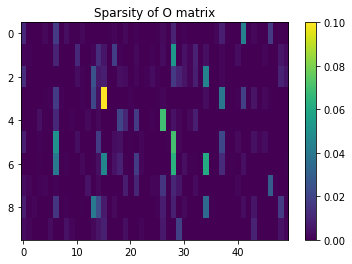

In [6]:
visualize_sparsities(hmm8_p, O_max_cols=50)

In [7]:
print('Sample Sentence:\n====================')
#print(sample_sentence(hmm8_p, obs_map_p, n_words=25))
#print(sample_sentence(hmm8_p, obs_map_p))
generated_sentence = sample_sentence(hmm8_p, obs_map_p, n_words=300)
print(generated_sentence)

Sample Sentence:
to in but love eyes as be it my winters preposterously not annexed as senses new summer's of did give to towers change wonder beloved and dost behold so make is so i an against thy fair enjoyed our nor just either of me thou hast lend of words doth in him deaths shouldst thou to happier breast the methinks with alter this becomes love is air very growing a not and devise of she give all and horse to how name nor thee extreme so all much you and that them physic of as spend shall me eyes then lively or were for days one to hath leave my not to to deserve their thou i my weakness bright still mind done with lovely ah not loss rack depend one ill whilst straight of your days a we for can which so in and said a on most you the from the in my salving no time yet till angel is but than fading my nature in wherefore him seeing thou the forsworn to to self out thee and review is my memory tripping hardest part more see turns as to vassalage come wrong first vow lose her o that

In [8]:
syllable_filename = "./project3/data/Syllable_dictionary.txt"
new_poem = generate_new_poem(generated_sentence, syllable_filename)
our_poem = "\n".join(new_poem)
print(our_poem)

in but love eyes as be it my winters
summer's of did give to towers change wonder
behold so make is so i an against
words doth in him deaths shouldst thou to happier
alter this becomes love is air very
all and horse to how name nor thee extreme
one to hath leave my not to to deserve
my weakness bright still mind done with lovely
on most you the from the in my salving
time yet till angel is but than fading
forsworn to to self out thee and review
wrong first vow lose her o that chest torment
she were but let to in in do accuse
or thine images all is old expressing


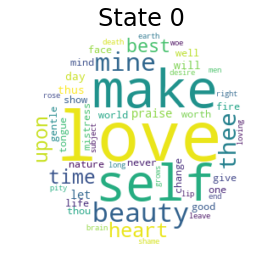

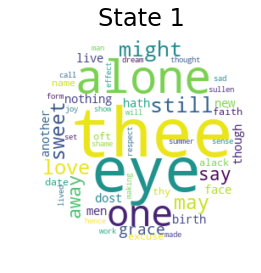

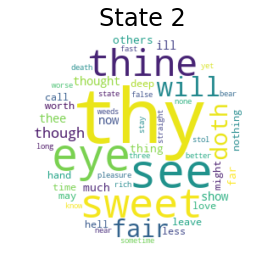

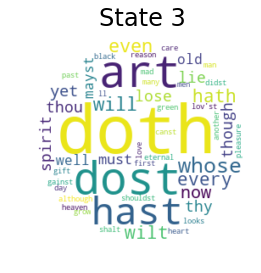

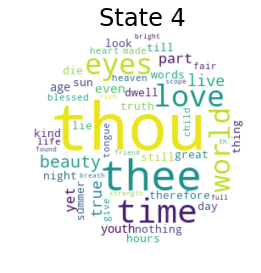

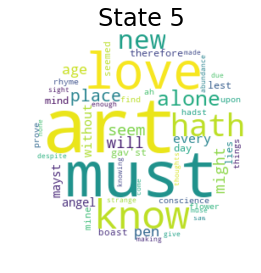

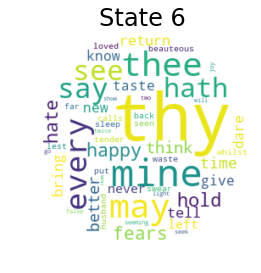

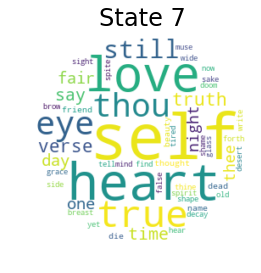

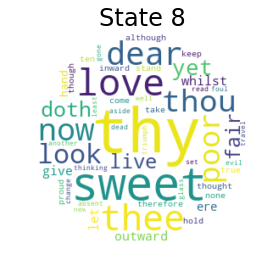

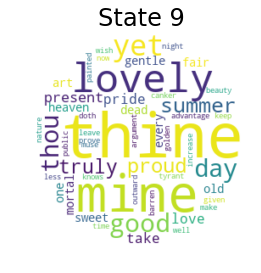

In [9]:
wordclouds = states_to_wordclouds(hmm8_p, obs_map_p)

In [10]:
# generate by the sequence of sentences

In [11]:
filename = "./project3/data/shakespeare.txt"
obs_s, obs_map_s = pre_processing_sentences(filename)

count of puncs =  0


In [12]:
hmm8_s = unsupervised_HMM(obs_s, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


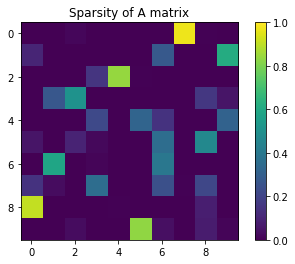

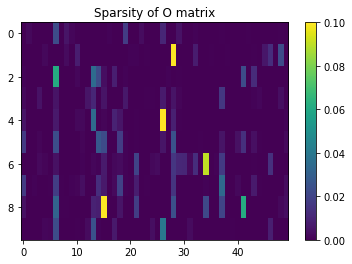

In [13]:
visualize_sparsities(hmm8_s, O_max_cols=50)

In [14]:
print('Sample Sentence:\n====================')
#print(sample_sentence(hmm8_s, obs_map_s, n_words=25))
#print(sample_sentence(hmm8_s, obs_map_s))
num_lines = 14
lines_of_poem = []
for i in range(num_lines):
    generated_sentence_s = sample_sentence(hmm8_s, obs_map_s, n_words=15)
    print("current line: ", generated_sentence_s)

Sample Sentence:
current line:  in side that slow it heat humour thee my my is are art a comments
current line:  are contented thee unmoved shore said his my daily that mourning love in beds wound
current line:  that you being sum nor plea thy it thought not this youth on i find
current line:  on filled dear discourse in will be in your hath pain thee a bounty of
current line:  to unseeing days thou thee wide abundance each dove heart's quickly be once nought and
current line:  show weigh act both day where pleasure present on life injurious with shall you it
current line:  to eat winters love's my found of part as your death doth every lips of
current line:  extremity eyes eye hand i though the each contrary born make that answers one banquet
current line:  passed which prove assistance unless to sum before which nor level of me love's thou
current line:  wherefore wishing thy ornament where divining thought monuments me from these first black wilt since
current line:  shalt o each ho

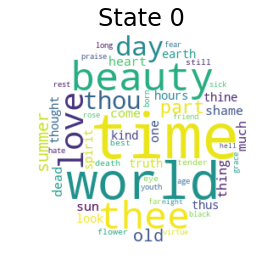

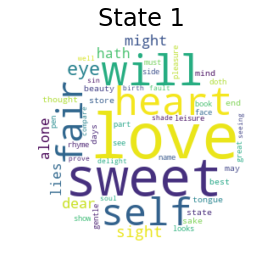

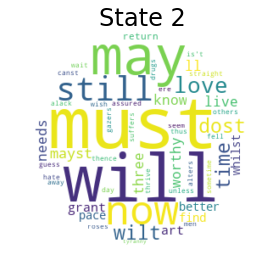

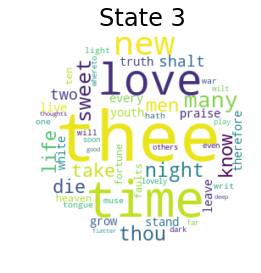

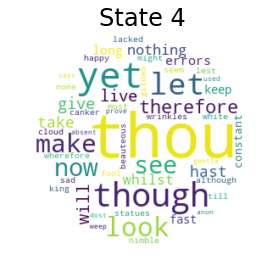

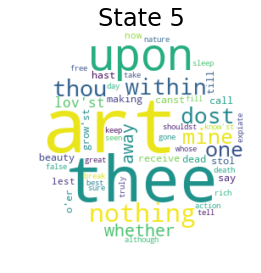

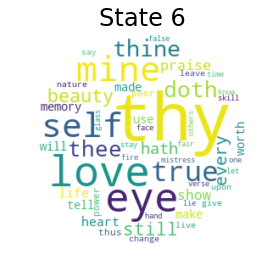

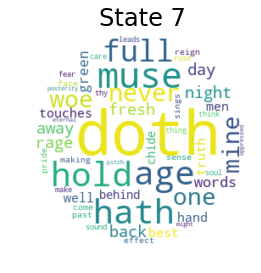

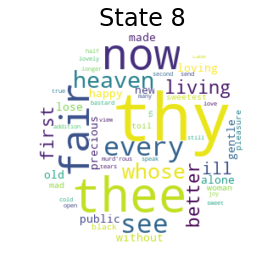

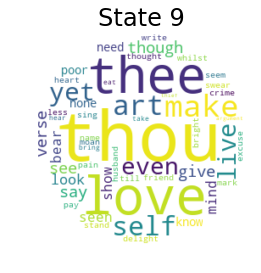

In [15]:
wordclouds_s = states_to_wordclouds(hmm8_s, obs_map_s)

In [4]:
def get_high_prob_obs(hmm, num_obs_displayed, obs_map_p_rev):
    A_mat = hmm.A
    O_mat = hmm.O
    state_obs_topN = collections.defaultdict(list)
    for i in range(len(O_mat)): # states, O_mat[i] are the probabilities of each obs under this state
        obs_prob = []
        for j in range(len(O_mat[i])): # observations
            heapq.heappush(obs_prob, (O_mat[i][j], obs_map_p_rev[j])) # (prob, obs-word)
        #print(obs_prob)
        top_n = heapq.nlargest(num_obs_displayed, obs_prob)
        for prob, obs in top_n:
            state_obs_topN[i].append(obs)
    return state_obs_topN

In [ ]:
num_hidden_states = [5, 8, 10, 15]
iterations = [50, 100, 120, 150]
num_obs_displayed = 15
num_lines = 14
poems = []
hmms = []

filename = "./project3/data/shakespeare.txt"
obs_p, obs_map_p = pre_processing_poems(filename)
obs_map_p_rev = {}
for key, value in obs_map_p.items():
    obs_map_p_rev[value] = key
    
for num_hs in num_hidden_states:
    print("__________________START___________________")
    print("Current number of hidden states = ", num_hs)
    for iteration in iterations:
        print("Current iteration time = ", iteration)
        hmm8_p = unsupervised_HMM(obs_p, num_hs, iteration)
        hmms.append(hmm8_p)
        state_obs_topN = get_high_prob_obs(hmm8_p, num_obs_displayed, obs_map_p_rev)
        for key, value in state_obs_topN.items():
            print("///State = ", key, ", top N prob obs: ", value, "///")

        visualize_sparsities(hmm8_p, O_max_cols=50)
        
        generated_sentence = sample_sentence(hmm8_p, obs_map_p, n_words=400)
        syllable_filename = "./project3/data/Syllable_dictionary.txt"
        new_poem = generate_new_poem(generated_sentence, syllable_filename)
        our_poem = "\n".join(new_poem)
        poems.append(our_poem)
        print("Our Poem: ")
        print(our_poem)
        
        wordclouds_p = states_to_wordclouds(hmm8_p, obs_map_p)
        anim = animate_emission(hmm8_p, obs_map_p, M=10)
        HTML(anim.to_html5_video())

        print("__________________END___________________")

__________________START___________________
Current number of hidden states =  5
Current iteration time =  50
Iteration: 10
